# Related Work
   Since sales are the life of any retail organization, forecasting sales in the retail space is crucial. Therefore, many researchers have carried out an accurate sales forecast and sales analysis. It has been found that a suitable predictive model that predicts sales can be found by looking at previous research on time series forecasting in finance using various machine learning algorithms. Because of the importance of prediction in many areas, many striking approaches have been developed. These methods are commonly referred to as statistical, machine learning, and hybrid methods. The most widely used models are time series analysis, autoregressive (AR) methods, autoregressive integrated moving average (ARIMA), and exponential smoothing methods. A time series forecasting and modeling is quite difficult due to other factors such as location, changing weather conditions, public events, holidays and festivals, it has a great impact on future demands, so the authors proposed to do Optimization of Grid Search (GSO) for forecasting sales. GSO is a technique that is assembled with the Extreme Gradient Boosting (Xgboost) algorithm. Xgboost is an extended version of Gradient Boosting Machines, which not only improves performance but also optimizes the system. The combination of GSO and Xgboost was used to select the best parameter for the predictive model after optimizing the various parameters of the Xgboost algorithm. Below is the workflow as the author creates the GSO-based future sales forecast:
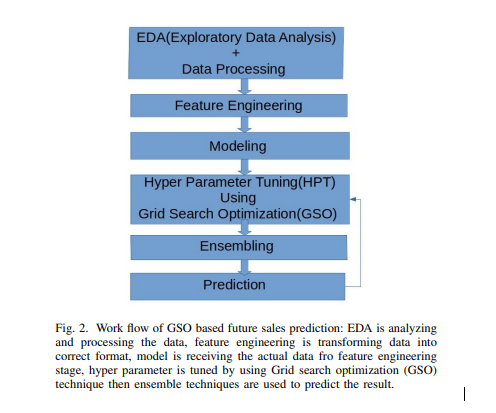
    In this research, the author designed a predictive model using collaborative techniques with the Xgboost algorithm in the Big Mart dataset to predict future sales of a particular store or Big Mart store. Experimental analysis found that the technique gave a more accurate prediction with the lowest RMSE and lowest RMSE MAE for both training and testing. It was also concluded that the model performs better when hyper parameters are set. As part of the future work goal, the author sought to improve the accuracy using advanced techniques for optimizing hyper parameters.

   Another forecasting is used regression and blended with Artificial Neural Networks (ANN). First regression is a locally weighted scatterplot smoothing (LOESS). LOESS will be used because it can smooth the dataset and can define a neighborhood for respectively point in the dataset. This neighborhood will include of k points adjacent to the chosen point. After that, it will fit a quadratic regression curve to the points in the neighborhood. The more weight of the points, the more closely adjacent in time than to more distant points. At this part, author do the depersonalized sales data because their dataset does not reveal the periodic pattern to the industry sales. To do the insight on sales forecasting, regression analysis will provide to determine the most indicators predictive ability. This regression can estimate the effect of independent variables (economic relationships) on the other dependent variable (industry sales). From here, it can build a general multivariate linear regression model. The seasonality can do when it blended with ANN to predict and compare them to the actual sales figure. This will calculate the percentage error of the model and evaluate the accuracy of the predictions. There are 3 stages to do the predictive such as training, validation and testing with ANN. 
   
   They faced three obstacles during this project. First, they found the easiest way to get rid of seasonality from the sales data. Second, they used statistical techniques combined with AIC, BIC and VIF to scale the set of economic indicators from 90 to 10, remanctively only for people who were the most important prediction for a given delay time. You enter these indicators into an ANN and receive unseasonally disfigured sales forecasts that take advantage of recurring training. Finally, after the reseasonalization of the forecasts, they were able to forecast future sales with relative error percentages of 5 to 10 percent, looking at the delay time. These relative errors represent a major improvement on the utilization of baseline forecasts. The model takes into reflection what's happening inside the corporate and within the economy as a whole, as not solely past trends, however conjointly changes in several economic factors have an effect on future sales. Therefore, the paths can be applied in different business areas. However, one could assume models for specific sectors to apply exclusive units of economic variables.



# **3.Features Selection**

Below is the import Libraries that we use in features selection.

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import mean
from numpy import std
import warnings

In [39]:
#Loading our data
train_df = pd.read_csv("/content/FeatureEngineering.csv")

In [40]:
train_df.head()

,Unnamed: 0,date_block_num,shop_id,item_id,item_cnt_day,lags: 1,lags: 2,lags: 3,lags: 4,lags: 5,lags: 6,lags: 7,lags: 8,lags: 9,lags: 10,lags: 11,shop_name,item_name,item_category_id,item_category_name
0,0,1,0,30,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,Кино - DVD
1,482,1,0,31,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,Кино - Blu-Ray
2,986,0,0,32,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",1+1,40,Кино - DVD
3,987,1,0,32,10.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",1+1,40,Кино - DVD
4,1771,0,0,33,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"!Якутск Орджоникидзе, 56 фран",1+1 (BD),37,Кино - Blu-Ray


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704112 entries, 0 to 704111
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          704112 non-null  int64  
 1   date_block_num      704112 non-null  int64  
 2   shop_id             704112 non-null  int64  
 3   item_id             704112 non-null  int64  
 4   item_cnt_day        704112 non-null  float64
 5   lags: 1             704112 non-null  float64
 6   lags: 2             704112 non-null  float64
 7   lags: 3             704112 non-null  float64
 8   lags: 4             704112 non-null  float64
 9   lags: 5             704112 non-null  float64
 10  lags: 6             704112 non-null  float64
 11  lags: 7             704112 non-null  float64
 12  lags: 8             704112 non-null  float64
 13  lags: 9             704112 non-null  float64
 14  lags: 10            704112 non-null  float64
 15  lags: 11            704112 non-nul

In [42]:
# Separating categorical data from numerical data
train_categorical_data = train_df.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = train_df.select_dtypes(include=['int64', 'float','int32'])

In [43]:
# Label Encode and Hot Encode for Categorical Columns
# the category data here will be converted to numbers format
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

### **3.1  Regression Features Selection**
 We do the first features selection using pearson correlation, where the pearson correlation is a 2 variables that divide by the product of their standard deviations.Using pearson's correlation feature selection, it will do for numeric input and numeric output. When we execute the script, it gives a list of column sorted by the best features.


In [44]:
# define feature selection
bestfeat = SelectKBest(score_func=f_regression, k='all')
# apply feature selection
X_selected = bestfeat.fit_transform(X, y)
print(X_selected.shape)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#This code is to used for visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #name of the columns in dataframe
print(featureScores.nlargest(6,'Score'))  #print 6 best features

(704112, 20)
      Specs          Score
8   lags: 1  945952.820544
9   lags: 2  573826.787565
10  lags: 3  491822.580126
11  lags: 4  402102.171439
12  lags: 5  378235.312794
13  lags: 6  329039.954910


### **3.2 RFE Features Selection**
Recursive Feature Elimination (RFE) is a one example of feature algorithm.  A machine learning dataset for classification or regression consists of rows associate in having columns like a surpass spreadsheet. Rows are referred as examples and the columns are referred to as options. Feature choose refers to techniques that select a set of the foremost relevant features (columns) for an information set. With fewer features, machine learning algorithms will run a lot of with efficiency (less abstraction or temporal complexity). Some machine learning algorithms may be fooled by unsuitable input characteristics, leading to worse prophetical performance. We choose RFE because we want to explore the number of designated options and wrapped algorithmic rule utilized by the RFE procedure. 


In [20]:
# Which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
data_month = pd.read_csv("/content/FeatureEngineering.csv")
train_categorical_data = data_month.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data_month.select_dtypes(include=['int64', 'float','int32'])
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)

# generate dataset
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = data_month['item_cnt_day']

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.1f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.0
Column: 1, Selected False, Rank: 14.0
Column: 2, Selected False, Rank: 13.0
Column: 3, Selected False, Rank: 6.0
Column: 4, Selected True, Rank: 1.0
Column: 5, Selected False, Rank: 2.0
Column: 6, Selected False, Rank: 15.0
Column: 7, Selected True, Rank: 1.0
Column: 8, Selected True, Rank: 1.0
Column: 9, Selected False, Rank: 4.0
Column: 10, Selected True, Rank: 1.0
Column: 11, Selected False, Rank: 7.0
Column: 12, Selected False, Rank: 5.0
Column: 13, Selected False, Rank: 3.0
Column: 14, Selected False, Rank: 9.0
Column: 15, Selected False, Rank: 10.0
Column: 16, Selected False, Rank: 8.0
Column: 17, Selected False, Rank: 12.0
Column: 18, Selected False, Rank: 11.0
Column: 19, Selected False, Rank: 16.0


When we execute this sript,the RFE have choose model, mean and standard deviations. Model that have higherst mean is Gradient Boosting Classifier.

>lr 0.812 (0.038)
>per 0.813 (0.034)
>cart 0.812 (0.035)
>rf 0.815 (0.037)
>gbm 0.817 (0.032)


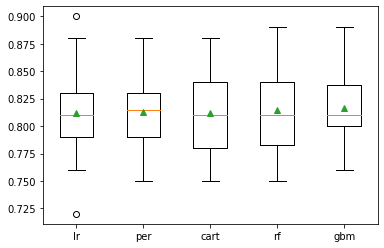

In [25]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = data_month['item_cnt_day']

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=2, random_state=1)
	return X, y

# To find which list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# To evaluate a  model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

#get the data
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# To evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()